Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [ ]:
NAME = ""  # your uniqname 
COLLABORATORS = c()  # vector of uniqnames of your collaborators, if any
## IMPORTANT: also enter your group information in Canvas when you upload the assignment

---

In [ ]:
library(tidyverse)
library(modelr)
library(lubridate)

# STATS 306
## Problem set 9: Modeling and regression
Each problem is worth two to four points, depending on difficulty, for a total of 20.

*Note*: you do not need to use `install.packages()` in this notebook. You may assume that we have already installed all of the necessary packages when we run your code.

#### Problem 1 (3 pts.)
The file `problem1.csv` is a CSV containing three columns:
- `year`, the year of the observation.
- `drm`, the divorce rate per 1,000 in the state of Maine.
- `pccm`, the per capita consumption of margarine in the United States.

Note: these are real data (not made up).

**(1 pt.)** Import the data and plot these two variables over time on adjacent graphs using `facet_wrap(..., scales="free")`.

In [ ]:
# YOUR CODE HERE
stop()

**(1 pt.)** Regress `drm` on `pccm` and summarize the regression using the `summary` function.

In [ ]:
# YOUR CODE HERE
stop()

**(1 pt.)** The regression indicates indicates a near perfect linear fit between `pccm` and `drm` ($R^2 > 0.98$; $p < 10^{-7}$). Explain in your own words why annual per capita margarine consumption almost perfectly predicts the divorce rate in Maine.

YOUR ANSWER HERE

#### Problem 2 (2 pts.)
This problem is designed to give you intuition for what you observed in Problem 1. 

The column `Pr(>|t|)` in a regression summary displays the p-value for each estimated regression coefficient:

In [ ]:
summary(lm(y ~ x, sim1))

A p-value of 0.05 is the conventional threshold for significance in scientific research. Even if there is no association between `y` and `x`, a p-value less than 0.05 will be observed about 5% of the time.

You will verify this by writing a function `num_significant(y, xs, alpha)` which takes a vector `y` of responses, and a list `xs` of vectors of predictors. For each element `xs[[i]]`, `num_significant` should regress `y` on `xs[[i]]` and record the p-value. The function should return the number of regressions for which the p-value on the `x` coefficient was below `alpha`.

In [ ]:
num_significant = function(y, xs, alpha) {
    # YOUR CODE HERE
    stop()
}

The tests below generate completely random data for `y` and `xs`. Hence, there is no true relationship between `y` and any of the `xs[[i]]`. Nevertheless, the tests show that on average about five `xs[[i]]` are significantly related to `y` at the 5% level. 

This is a very simple illustration of a practice called [p-hacking](https://en.wikipedia.org/wiki/Data_dredging): purely by chance, statistically significant relationships can be uncovered in data simply by estimating a large number of models. This is a problem in certain fields where there is great pressure to obtain statistically significant results in order to (for example) publish research papers in scientific journals.

In [ ]:
for (s in list(c(1, 7), c(2, 3))) {
    set.seed(s[1])
    y = rnorm(50)
    xs = map(1:100, ~ rnorm(50))
    stopifnot(num_significant(y, xs, .05) == s[2])
} 

#### Problem 3 (4 pts.)
In lecture we noted that least-squares regression is susceptible to outliers, in the sense that a single outlying data point can have a large effect on the fitted regression line. For example, consider the following two model fits:

In [ ]:
lm(y ~ x, sim1)
lm(y ~ x, rbind(sim1, c(x=10, y=100)))

Although we added just a single observation, the regression estimates change substantially. The data point we added, $(10,1000)$, can be said to have substantial *influence* over the estimates.

Building on this idea, we can measure each point's influence by studying how much the model's predictions change if we drop that point and re-fit the model.

Let $\hat{y}_1,\hat{y}_2,\dots,\hat{y}_n$ be the predictions obtained for each $x_i$ when the model is fit to the complete data set. Next, for each data point $j=1,\dots,n$ we fit a new model to the data set with the $j$th observation removed. We use this model to generate new predictions $\tilde{y}_i^{(j)},\,i=1,\dots,n$ for each $x_i$. (Note that this *includes* the point $x_j$ which we dropped when fitting the model. It's perfectly acceptable to use a model to predict "out of sample" on data points that were not present when the model was fitted.)

Our measure of influence for observation $j$ is then defined to be 

$$D_j = \sum_{i=1}^n (\hat{y}_i - \tilde{y}_i^{(j)})^2.$$

**(3 pts.)** Write a function `compute_D(method, y, x)` which takes as arguments a model-fitting method (for example, `lm` or `MASS::rlm`, a vector `y` of responses, and an equal-length vector `x` of predictors, and returns a vector of influence scores $(D_1, D_2, \dots, D_n)$ (one for each observation pair `(x[i], y[i])`) when using `method` to fit the model `y ~  x`.

In [ ]:
compute_D = function(method, y, x) {
    # YOUR CODE HERE
    stop()
}

In [ ]:
stopifnot(near(
    sum(compute_D(lm, c(sim1$y, 100), c(sim1$x, 10))), 
    6441.042, 
    tol = 1e-3))
stopifnot(near(
    sum(compute_D(lm, sim4$y, sim4$x2)),
    1751.485,
    tol = 1e-3))

**(1 pt.)**
The `MASS::rlm` command is a "robust" version of `lm`, meaning it is not as susceptible to outliers. Verify this by using the function you defined above to compute, for both of these methods, the $D$ score of the final (outlying) observation in the following data set:

In [ ]:
sim1_outlier = rbind(sim1, c(20, 300))

Store your answers in variables called `D_lm` and `D_rlm`.

In [ ]:
D_lm = NA
D_rlm = NA
# YOUR CODE HERE
stop()

In [ ]:
stopifnot(near(D_lm, 6e4, tol = 1e4))
stopifnot(near(D_rlm, 100, tol = 1e2))

#### Problem 5 (3 pts.)
In lecture we noted that if `x` is a categorical variable, then the regression `lm(y ~ x)` fits a model where each level of `x` has a different mean. For example:

In [ ]:
fit = lm(y ~ x, sim2, subset = x %in% c('a', 'd'))
summary(fit)

The estimated mean for level `x=='a'` is $1.15$ and for `x=='d'` it is $1.15 + .758 = 1.91$. Hence if the coefficient on `xd` is zero, then the means are equal. The p-value `.1052` measures how much evidence there is of a non-zero relationship.

-----------

In STATS 250 you learned about another way to test whether the means of two populations are equal: the $t$-test. Using this method, we get:

```
> t.test(sim2_xa, sim2_xd)

	Welch Two Sample t-test

data:  sim2_xa and sim2_xd
t = -1.7063, df = 17.935, p-value = 0.1052
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6933915  0.1757631
sample estimates:
mean of x mean of y 
 1.152166  1.910981 
```

Notice that the mean estimates as well as p-values are identical. This is not a coincidence; the t-test and regression methods are equivalent.

----------
Verify this by writing a function `compare_tests(df)`, where: 
- `df` is a data frame: 
    - `df$x` is a factor with two levels, and
    - `df$y` is a continuous random variable. 
- `compare_tests(df)` returns a vector of length two:
    - the first entry is named `regression` and gives the p-value obtained from the regression method
    - the second entry is named `t.test` gives the p-value obtained from running a `t.test` of means between the two populations specified by `df$x`.
    
Thus, for the example above,
```
> compare_tests(sim2 %>% filter(x %in% c('a', 'd')))
regression     t.test 
 0.1051552  0.1052173 
```

In [ ]:
compare_tests = function(df) {
    # YOUR CODE HERE
    stop()
}

In [ ]:
ans = compare_tests(sim2 %>% filter(x %in% c('a', 'd')))
stopifnot(near(
    ans,
    c(0.1051552, 0.1052173),
    tol = 1e-6))
stopifnot(names(ans) == c("regression", "t.test"))

df = mpg %>% filter(manufacturer %in% c('audi', 'ford')) %>% 
             select(x = manufacturer, y = cty)
stopifnot(near(compare_tests(df), c(4.023519e-07, 7.065593e-07)))

#### Problem 6 (4 pts.)
In this problem we will investigate a function 

$$R_k(\mathbf{y},m) = \sum_{i=1}^n |y_i - m|^k$$

which, given a vector of data $\mathbf{y}$, a number $m$, and an integer $k$, computes the sum of differences $|y_i-m|^k$.

**(1 pt.)** Implement the function $R_k(\mathbf{y}, m)$ defined above. You may assume that $k$ is a non-negative integer. If $k=0$ then, for reasons discussed below, we define

$$|y_i-m|^0 = \begin{cases}
0, &y_i = m\\
1, &\text{otherwise.}
\end{cases}
$$

In [ ]:
R = function(y, m, k) {
    # YOUR CODE HERE
    stop()
}

In [ ]:
stopifnot(R(1:10, 5, 0) == 9)
stopifnot(R(1:10, 5, 1) == 25)
stopifnot(R(1:10, 5, 2) == 85)

**(1 pt.)** From our discussion in lecture, we know that the value of $m$ which minimizes $R_2(\mathbf{y},m)$ equals the regression estimate of $a_0$ in the intercept-only model 

$$y = a_0 + \epsilon.$$

In other words, $m$ equals the mean of $\mathbf{y}$. 

Write a function `plot_resid(y, k)` which plots `R(y, m, k)` for $m=y_1,y_2,\dots,y_n$, and use it to verify that the minimum of `R(sim1$x, m, 2)` occurs when `m` is near `mean(y)`.

In [ ]:
plot_resid = function(y, k) {
    # YOUR CODE HERE
    stop()
}
y = rnorm(1000)
plot_resid(y, 2) + geom_vline(xintercept = mean(y), colour="blue")

**(1 pt.)** If instead we chose $m$ to minimize

$$\sum_{i=1}^n |y_i - m|^1,$$ 

it turns out that any such $m$ is a *median* of the vector $\mathbf{y}$. (That is, $m$ is $\le$ than at least half of the $y_i$, and $\ge$ than at least half of the $y_i$.) Verify this by plotting `plot_resid(1:10, 1)` and adding a vertical line at the location of the median of this vector.

In [ ]:
# YOUR CODE HERE
stop()

**(1 pt.)** 
In the previous two parts we saw that:
- Minimizing $\sum_{i=1}^n |y_i - m|^2$ with respect to $m$ yields the *mean* of $y_1,\dots,y_n$; and
- Minimizing $\sum_{i=1}^n |y_i - m|^1$ with respect to $m$ yields a *median* of $y_1,\dots,y_n$.

You might wonder what happens if we go a step further and minimize 

$$\sum_{i=1}^n |y_i - m|^0$$

with respect to $m$? 

For this to even make sense, we need to decide what $|y_i - m|^0$ even means when $y_i=m$ since $0^0$ is not defined. Because $|y_i - m|$ is supposed to measure error, we will choose $|y_i - m|^0 = 0$ if $m=y_i$; otherwise $|y_i - m|^0=1$ in accordance with the standard definition $x^0=1,x\neq 0$.

Try looking at `plot_resid(y, 0)` for a few different values of $y$. Describe in your own words what the minimal $m$ represents in this case. (*Hint*: what happens if $y$ has repeated values?) 

YOUR ANSWER HERE

#### Problem 7 (4 pts.)
In lecture we saw that fitting the regression model

$$y = a_0 + a_1 x + \epsilon$$ 

amounts to minimizing the vertical distance between each data point $(x_i,y_i)$ and its fitted value $(x_i, \hat{y}_i)$. On the `sim1` data set this looks like:

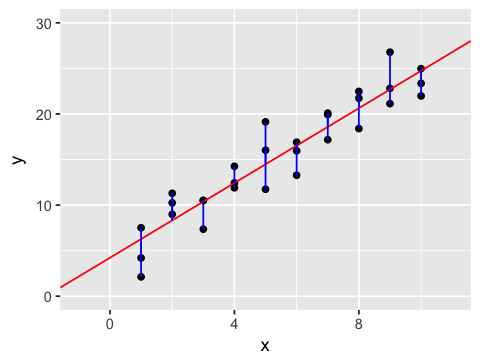

By symmetry, if we regressed $x$ on $y$, i.e. fitting the model

$$x = a_0 + a_1 y + \epsilon,$$

this would be equivalent to minimizing the *horizontal* distance between each point and its predicted value:

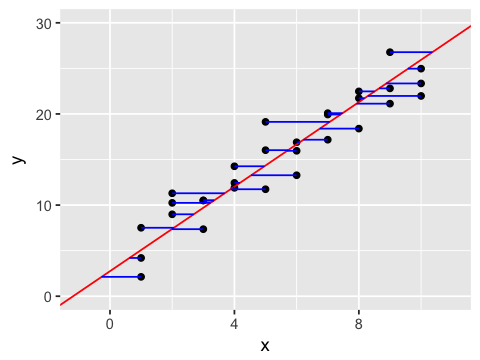



What if we instead minimized the distance between each data point and its right-angle projection onto the red line?:

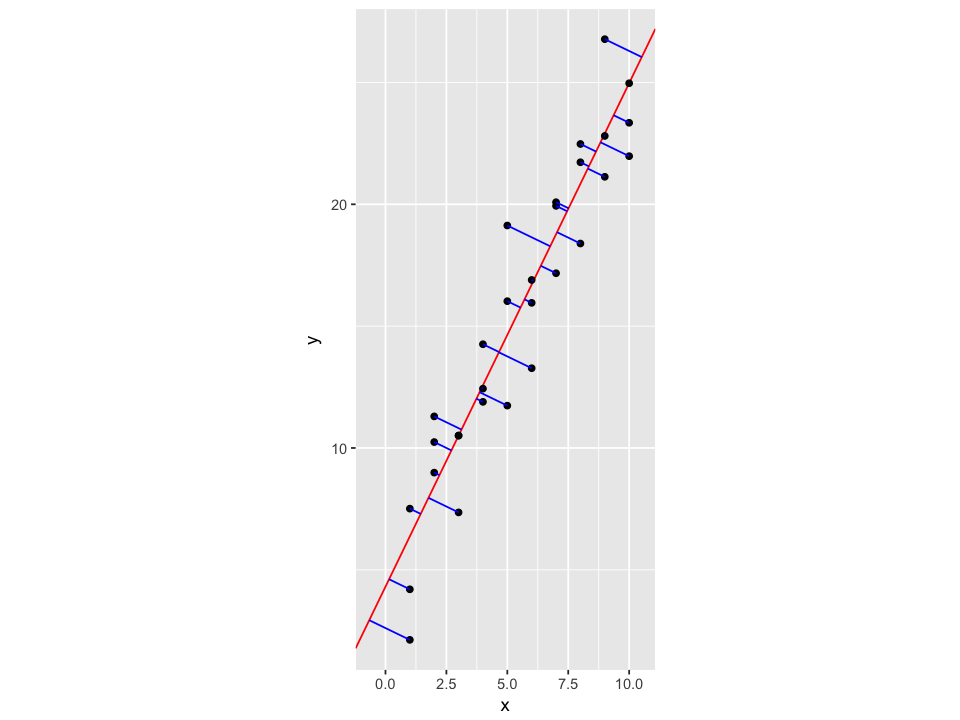

This line is called the *first [principal component](https://en.wikipedia.org/wiki/Principal_component_analysis)* of the data $(x_i,y_i),\,i=1,\dots,n$.

Write a function `f_proj` which computes the first principal component: given vectors $x$ and $y$, `f_proj(x, y)` returns a vector `(a0, a1)` such that the sum of squared distances between each point $(x_i,y_i)$ and the line $y=a_0 + a_1 x$ is minimized.

(*Hint*: the shortest distance from a point $(x_i,y_i)$ to the line $y=a_0 + a_1 x$ is given by 

$$\frac{\left|y_i - a_0 - a_1 x_i\right|}{\sqrt{1 + a_1^2}}.$$

In [ ]:
f_proj = function(x, y) {
    # YOUR CODE HERE
    stop()
}

In [ ]:
stopifnot(near(f_proj(sim1$x, sim1$y), c(4.307018, 2.066111), tol = 1e-6))
stopifnot(near(f_proj(sim3$x1, sim3$y), c(7.8823792, -0.8243008), tol = 1e-6))
stopifnot(near(f_proj(log(diamonds$price), log(diamonds$carat)), 
               c(-4.8539376, 0.5731109), tol = 1e-6))